In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = './ramen-ratings.csv'
ramen_df = pd.read_csv(filename)
ramen_df.info()
ramen_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
for col in ramen_df.columns:
    series = ramen_df[col]
    print("SERIES --->\n", series)
    # print("SERIES columns --->\n", series[1])
    

SERIES --->
 0       2580
1       2579
2       2578
3       2577
4       2576
        ... 
2575       5
2576       4
2577       3
2578       2
2579       1
Name: Review #, Length: 2580, dtype: int64
SERIES --->
 0            New Touch
1             Just Way
2               Nissin
3              Wei Lih
4       Ching's Secret
             ...      
2575             Vifon
2576           Wai Wai
2577           Wai Wai
2578           Wai Wai
2579          Westbrae
Name: Brand, Length: 2580, dtype: object
SERIES --->
 0                               T's Restaurant Tantanmen 
1       Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...
2                           Cup Noodles Chicken Vegetable
3                           GGE Ramen Snack Tomato Flavor
4                                         Singapore Curry
                              ...                        
2575    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
2576                       Oriental Style Instant Noodles
2577             

In [4]:
# list of columns
ramen_df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [5]:
# how many rows/columns
ramen_df.shape

(2580, 7)

In [6]:
# describes the whole df- some basic statistics of the numerical data of my data table
# ramen_df['Stars'].describe() #why didn't it give the stats of this row? because "stars" is a object and .describe only works on numeric values
# ramen_df['Stars'].max()

In [7]:
ramen_df.duplicated().sum() #no duplicates
# ramen_df.isna().sum()

0

In [8]:
ramen_df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [9]:
ramen_df[ramen_df.loc[:,'Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [10]:
# drops a specific value from a specific column
ramen_df.drop(ramen_df.loc[ramen_df['Stars']== 'Unrated'].index, inplace=True)

In [11]:
ramen_df[ramen_df.loc[:,'Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten


In [17]:
# converting Data Types from obj to float
ramen_df['Stars'] = ramen_df['Stars'].astype(float)
# ramen_df['Stars']
# ramen_df['Stars'].mean()
ramen_df['Stars'].describe()


count    2577.000000
mean        3.654676
std         1.015331
min         0.000000
25%         3.250000
50%         3.750000
75%         4.250000
max         5.000000
Name: Stars, dtype: float64

<Axes: title={'center': 'Awesome Ramen'}, xlabel='Country'>

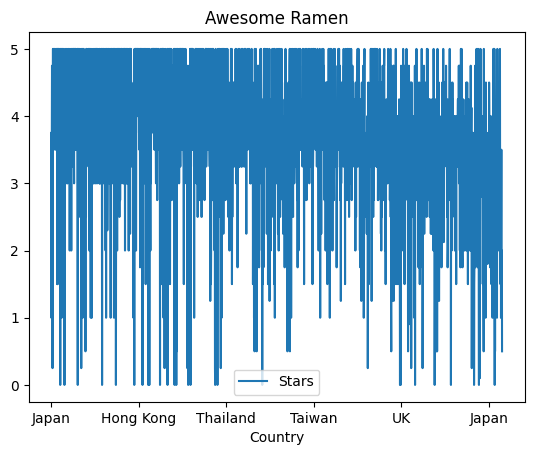

In [23]:
# ramen_df.plot(kind='bar') # not good
# looks like the y-axis has to be numeric
# ramen_df.plot(x='Country', y ='Stars', title='Awesome Ramen') #not good


In [24]:
import matplotlib.pyplot as plt


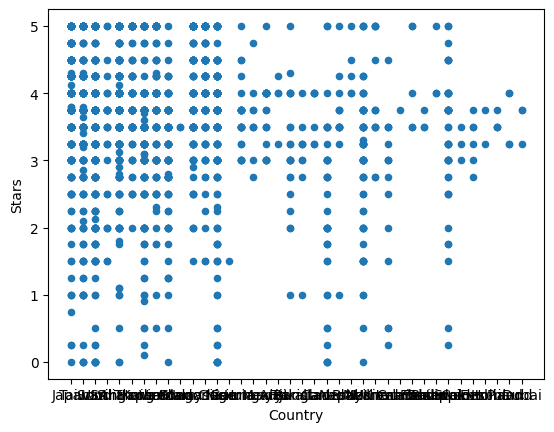

In [26]:
# nope not good either 
# ramen_df.plot(kind='scatter',x='Country', y ='Stars') 
# plt.show()


You call .groupby() and pass the name of the column that you want to group on, which is "country". Then, you use ["Stars"] to specify the columns on which you want to perform the actual aggregation (the formation of a number of things into a cluster.)

In [54]:
topRating = ramen_df['Stars'] >= 5
top10Countries = ramen_df[topRating].groupby('Country')['Stars'].count().nlargest(10)
# top10Countries = ramen_df[topRating] 
# ramen_df[top10Countries]
top10Countries

Country
Japan          74
Malaysia       54
Taiwan         48
South Korea    44
Singapore      36
USA            31
Indonesia      23
Hong Kong      22
Thailand       19
China          12
Name: Stars, dtype: int64

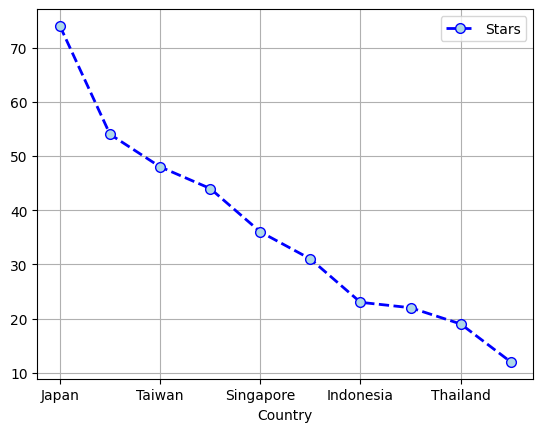

In [85]:
# fig, axs = plt.subplots(2,1)
# plt.xlabel("Country")
# plt.ylabel("Num of Stars Rating")


# figure out how to better visualize 
top10Countries_df = pd.DataFrame(top10Countries)
top10Countries_df.plot(color='blue', marker='o', 
                    linestyle='dashed', linewidth=2, 
                    markersize=7, markerfacecolor='lightBlue')
plt.grid()

